# Neccessary Setup

This part of the code can be changed as per the environment we are working on, this traing was done completely on google collab except the finetuning and final testing.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# prompt: Go to the path Cart_Pole_problem

%cd /content/drive/MyDrive/Cart_Pole_problem


/content/drive/MyDrive/Cart_Pole_problem


In [3]:
!pip install --upgrade gym
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827618 sha256=6442734afea5fbed0c81167526afc37462a2f4b81139b49d1ad59958964d6096
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.9 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.0 MB/s eta 0:00:00


# Prerequisites

Includes the files that need to be imported to run this main file

In [4]:
import gym
from gym_wrapper import GymWrapper
from hardware_interface import HardwareInterface
from control_algorithm import QLearningControl, SarsaControl, DQNControl
from data_logger import DataLogger
import config
import matplotlib.pyplot as plt
import numpy as np
from exploration_strategies import EpsilonGreedyStrategy, SoftmaxStrategy

from hyperparameter_tuning import tune_hyperparameters_qlearning, tune_hyperparameters_sarsa
from hyperparameter_tuning import tune_hyperparameters_dqn
from cross_validation import train_dqn
from cross_validation import run_cross_validation_or_training

# Selecting Model

In this section we can choose which model we need to work with

In [5]:
##   We can comment or activate the model lines we need


model='dqn'
#model='qlearning'
#model='sarsa'

# Hyperparameter Tuning

This section is to be used for the initial hyperparameter tuning for the bets initial hyoeroarameters.

In [9]:
model_map = {
    'dqn': {
        'control_class': DQNControl,
        'tuning_function': tune_hyperparameters_dqn
    },
    'qlearning': {
        'control_class': QLearningControl,
        'tuning_function': tune_hyperparameters_qlearning
    },
    'sarsa': {
        'control_class': SarsaControl,
        'tuning_function': tune_hyperparameters_sarsa
    }
}

# Get the control class and tuning function for the selected model
control_class = model_map[model]['control_class']
tuning_function = model_map[model]['tuning_function']

# Perform hyperparameter tuning
tuning_function(control_class, EpsilonGreedyStrategy, config)

# Initialize environment
use_hardware = False  # Set to True when using physical hardware

if use_hardware:
    env = HardwareInterface(config.HARDWARE_PARAMS)
else:
    env = GymWrapper(gym.make('CartPole-v1'))

# Initialize exploration strategy
exploration_strategy = EpsilonGreedyStrategy(epsilon=config.CONTROL_PARAMS['epsilon'])

# Initialize the controller using the selected model's control class
controller = control_class(config.CONTROL_PARAMS, exploration_strategy)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


KeyboardInterrupt: 

# Training the model
This section is to be used for training and saving the model and displaying outputs for Sarsa and QLearning only

  Learning Rate: 0.001
  Discount Factor: 0.99
  Epsilon: 1.0


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/content/drive/MyDrive/Cart_Pole_problem/control_algorithm.py:99: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  states = torch.tensor(states, dtype=torch.float32)


Episode 10/1000 - Training Reward: 18.00 - Epsilon: 0.9511 - Avg Reward: 19.20 - Evaluation Reward: 9.10
Episode 20/1000 - Training Reward: 11.00 - Epsilon: 0.9046 - Avg Reward: 18.60 - Evaluation Reward: 9.80
Episode 30/1000 - Training Reward: 27.00 - Epsilon: 0.8604 - Avg Reward: 22.43 - Evaluation Reward: 9.40
Episode 40/1000 - Training Reward: 13.00 - Epsilon: 0.8183 - Avg Reward: 22.23 - Evaluation Reward: 9.10
Episode 50/1000 - Training Reward: 8.00 - Epsilon: 0.7783 - Avg Reward: 21.28 - Evaluation Reward: 9.20


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Episode 60/1000 - Training Reward: 21.00 - Epsilon: 0.7403 - Avg Reward: 20.80 - Evaluation Reward: 9.70
Episode 70/1000 - Training Reward: 20.00 - Epsilon: 0.7041 - Avg Reward: 20.06 - Evaluation Reward: 10.10
Episode 80/1000 - Training Reward: 18.00 - Epsilon: 0.6696 - Avg Reward: 16.62 - Evaluation Reward: 9.70
Episode 90/1000 - Training Reward: 13.00 - Epsilon: 0.6369 - Avg Reward: 15.64 - Evaluation Reward: 9.20
Episode 100/1000 - Training Reward: 21.00 - Epsilon: 0.6058 - Avg Reward: 15.92 - Evaluation Reward: 9.20
Episode 110/1000 - Training Reward: 12.00 - Epsilon: 0.5762 - Avg Reward: 15.40 - Evaluation Reward: 9.90
Episode 120/1000 - Training Reward: 23.00 - Epsilon: 0.5480 - Avg Reward: 15.54 - Evaluation Reward: 11.10
Episode 130/1000 - Training Reward: 9.00 - Epsilon: 0.5212 - Avg Reward: 16.48 - Evaluation Reward: 10.40
Episode 140/1000 - Training Reward: 19.00 - Epsilon: 0.4957 - Avg Reward: 17.20 - Evaluation Reward: 9.30
Episode 150/1000 - Training Reward: 12.00 - Epsi

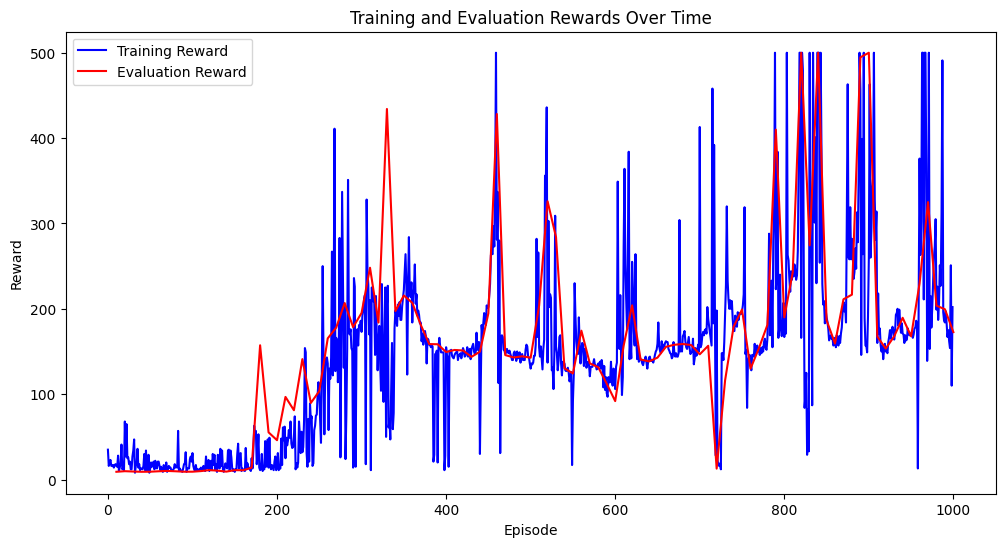

DQN Training completed. You can now test the agent.


In [6]:
print(f"  Learning Rate: {config.CONTROL_PARAMS['learning_rate']}")
print(f"  Discount Factor: {config.CONTROL_PARAMS['discount_factor']}")
print(f"  Epsilon: {config.CONTROL_PARAMS['epsilon']}")

from cross_validation import run_cross_validation_or_training
import joblib

controller = run_cross_validation_or_training(model)

In [7]:
if controller is not None:
    joblib.dump(controller, 'trained_dqn_model.pkl')

# Testing for QLearning

This section if for testing the model and saving the test logs, created by qlearning only

In [ ]:
# Testing phase
import joblib
import os

model_path = os.path.join(config.LOG_PARAMS['save_path'], 'trained_dqn_model_with_params.pkl')
controller = joblib.load(model_path)

success_threshold=195

test_episodes = 100
test_rewards = []
test_lengths = []

test_logger = DataLogger(config.LOG_PARAMS)

# Initialize the environment
env = GymWrapper(gym.make('CartPole-v1'))

for episode in range(test_episodes):
    state = env.reset()
    episode_reward = 0
    episode_length = 0

    while True:

        #env.render()
        # Get the action from the trained model without exploration (epsilon=0)
        action = controller.get_action(state, epsilon=0.0)
        next_state, reward, done, _ = env.step(action)
          # Logging each step in the episode
        test_logger.log(state, action, reward, next_state)

        state = next_state
        episode_reward += reward
        episode_length += 1
        if done:
            break

    # Log the episode-level data
    test_logger.log_episode(episode, episode_reward, episode_length)

    test_rewards.append(episode_reward)
    test_lengths.append(episode_length)

# Calculate and print the test metrics
average_test_reward = np.mean(test_rewards)
average_test_length = np.mean(test_lengths)
success_rate = np.mean([1 if r >= success_threshold else 0 for r in test_rewards])

print(f"Average Test Reward over {test_episodes} episodes: {average_test_reward}")
print(f"Average Test Episode Length: {average_test_length}")
print(f"Success Rate: {success_rate * 100}%")

AttributeError: 'dict' object has no attribute 'get_action'

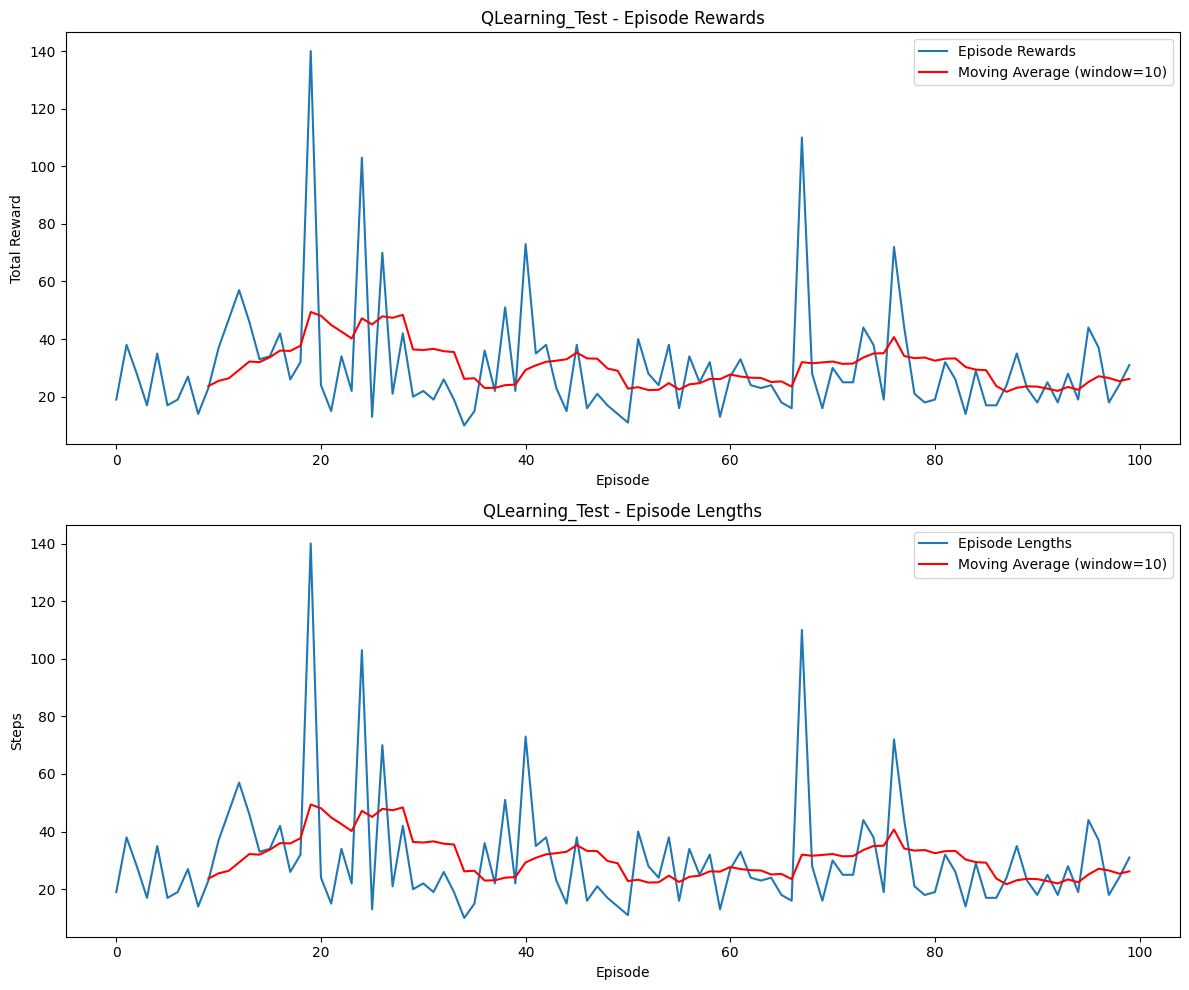

In [ ]:
test_logger.save_metrics(state='test')

# Optionally, save logs and plot the results
test_logger.save_logs_as_csv(state='test')
test_logger.plot_results(model_name='QLearning_Test', window_size=10)

# Testing for DQN
This section is to be used only for testing the DQN model and to display and save its results

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


Episode 1/100: Reward = 173.0, Length = 173
Episode 2/100: Reward = 177.0, Length = 177
Episode 3/100: Reward = 186.0, Length = 186
Episode 4/100: Reward = 179.0, Length = 179
Episode 5/100: Reward = 180.0, Length = 180
Episode 6/100: Reward = 162.0, Length = 162
Episode 7/100: Reward = 167.0, Length = 167
Episode 8/100: Reward = 163.0, Length = 163
Episode 9/100: Reward = 178.0, Length = 178
Episode 10/100: Reward = 184.0, Length = 184
Episode 11/100: Reward = 176.0, Length = 176
Episode 12/100: Reward = 162.0, Length = 162
Episode 13/100: Reward = 172.0, Length = 172
Episode 14/100: Reward = 178.0, Length = 178
Episode 15/100: Reward = 173.0, Length = 173
Episode 16/100: Reward = 170.0, Length = 170
Episode 17/100: Reward = 169.0, Length = 169
Episode 18/100: Reward = 177.0, Length = 177
Episode 19/100: Reward = 182.0, Length = 182
Episode 20/100: Reward = 163.0, Length = 163
Episode 21/100: Reward = 166.0, Length = 166
Episode 22/100: Reward = 173.0, Length = 173
Episode 23/100: Rew

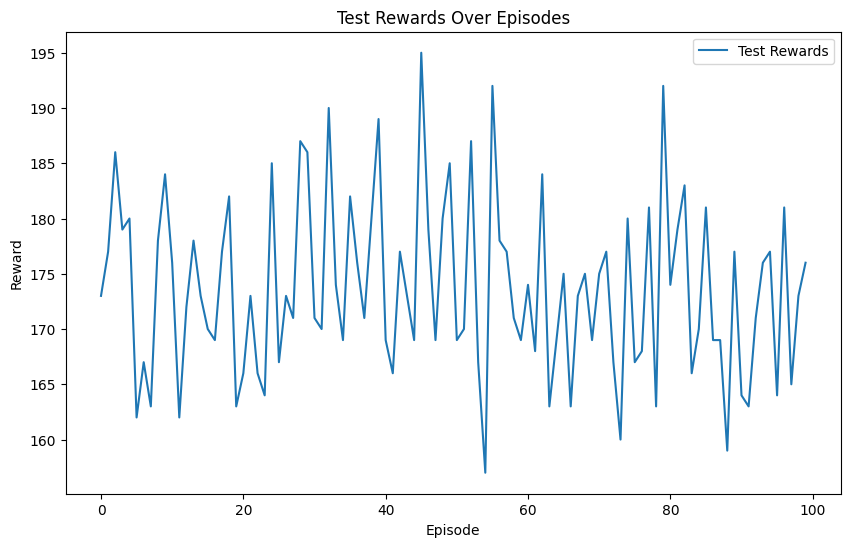

In [8]:
import gym
import joblib
import torch
import matplotlib.pyplot as plt
import csv
from control_algorithm import DQNControl  # Assuming this is your DQN model class
from gym_wrapper import GymWrapper
import config
import os

def test_dqn(model_class, config, num_episodes=100):
    env = GymWrapper(gym.make('CartPole-v1'))

    # Load the trained model
    model_path = os.path.join(config.LOG_PARAMS['save_path'], 'trained_dqn_model_with_params.pkl')
    model_info = joblib.load(model_path)
    controller = model_info['model']

    # Set the model to evaluation mode if using PyTorch
    if isinstance(controller.model, torch.nn.Module):
        controller.model.eval()

    test_rewards = []
    test_lengths = []

    for episode in range(num_episodes):
        state = env.reset()
        episode_reward = 0
        episode_length = 0
        done = False

        while not done:
            # Get the action from the model, without exploration (epsilon=0 or explore=False)
            action = controller.get_action(state, explore=False)
            next_state, reward, done, _ = env.step(action)
            episode_reward += reward
            state = next_state
            episode_length += 1

        test_rewards.append(episode_reward)
        test_lengths.append(episode_length)

        print(f"Episode {episode + 1}/{num_episodes}: Reward = {episode_reward}, Length = {episode_length}")

    # Calculate and print the average reward and length
    average_test_reward = sum(test_rewards) / num_episodes
    average_test_length = sum(test_lengths) / num_episodes

    print(f"Average Test Reward over {num_episodes} episodes: {average_test_reward}")
    print(f"Average Test Episode Length: {average_test_length}")

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(test_rewards, label='Test Rewards')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Test Rewards Over Episodes')
    plt.legend()

    # Save the plot
    plot_path = os.path.join(config.LOG_PARAMS['save_path'], 'test_rewards_plot.png')
    plt.savefig(plot_path)
    plt.show()

    # Save the test results to a CSV file
    log_path = os.path.join(config.LOG_PARAMS['save_path'], 'test_logs.csv')
    with open(log_path, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Episode', 'Reward', 'Length'])
        for i in range(num_episodes):
            writer.writerow([i + 1, test_rewards[i], test_lengths[i]])

    env.close()

# Example usage for testing
test_dqn(DQNControl, config)

In [ ]:
env.close()

# Testing Sarsa

This section is to be used only for testing the Sarsa model and to display and save its results

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
import os

def plot_test_results(logger, save_path=None):
    plt.figure(figsize=(12, 6))

    # Plot test rewards
    plt.plot(logger.episode_rewards, label='Test Reward', color='green')

    # Optionally, plot average reward (moving average)
    window_size = 10
    avg_rewards = np.convolve(logger.episode_rewards, np.ones(window_size) / window_size, mode='valid')
    plt.plot(range(len(avg_rewards)), avg_rewards, label='Average Test Reward', color='orange')

    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('SARSA Test Rewards')
    plt.legend()

    if save_path:
        plt.savefig(save_path)
    plt.show()

# Modify the test_sarsa function to include plotting
def test_sarsa(model_class, config, num_episodes=100):
    env = GymWrapper(gym.make('CartPole-v1'))

    # Load the trained SARSA model
    model_path = os.path.join(config.LOG_PARAMS['save_path'], 'sarsa_model.pkl')
    controller = joblib.load(model_path)

    test_rewards = []
    test_lengths = []

    for episode in range(num_episodes):
        state = env.reset()
        episode_reward = 0
        done = False
        t = 0

        action = controller.get_action(state)  # Initial action

        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = controller.get_action(next_state)  # Next action

            # No update to Q-table here, just testing
            state = next_state
            action = next_action
            episode_reward += reward
            t += 1

        test_rewards.append(episode_reward)
        test_lengths.append(t)

        print(f"Episode {episode + 1}/{num_episodes}: Reward = {episode_reward}, Length = {t}")

    # Calculate and print the average reward and length
    average_test_reward = sum(test_rewards) / num_episodes
    average_test_length = sum(test_lengths) / num_episodes

    print(f"Average Test Reward over {num_episodes} episodes: {average_test_reward}")
    print(f"Average Test Episode Length: {average_test_length}")

    # Save the test results in logs
    test_logger = DataLogger(config.LOG_PARAMS)
    test_logger.episode_rewards = test_rewards
    test_logger.episode_lengths = test_lengths
    test_logger.save_logs_as_csv(state='test')
    test_logger.save_metrics(state='test')

    # Plot and save the test results
    plot_path = os.path.join(config.LOG_PARAMS['save_path'], 'sarsa_test_plot.png')
    plot_test_results(test_logger, save_path=plot_path)

    env.close()

Episode 1/100: Reward = 10.0, Length = 10
Episode 2/100: Reward = 13.0, Length = 13
Episode 3/100: Reward = 10.0, Length = 10
Episode 4/100: Reward = 9.0, Length = 9
Episode 5/100: Reward = 11.0, Length = 11
Episode 6/100: Reward = 13.0, Length = 13
Episode 7/100: Reward = 9.0, Length = 9
Episode 8/100: Reward = 9.0, Length = 9
Episode 9/100: Reward = 10.0, Length = 10
Episode 10/100: Reward = 9.0, Length = 9
Episode 11/100: Reward = 9.0, Length = 9
Episode 12/100: Reward = 10.0, Length = 10
Episode 13/100: Reward = 9.0, Length = 9
Episode 14/100: Reward = 13.0, Length = 13
Episode 15/100: Reward = 13.0, Length = 13
Episode 16/100: Reward = 10.0, Length = 10
Episode 17/100: Reward = 13.0, Length = 13
Episode 18/100: Reward = 9.0, Length = 9
Episode 19/100: Reward = 9.0, Length = 9
Episode 20/100: Reward = 12.0, Length = 12
Episode 21/100: Reward = 9.0, Length = 9
Episode 22/100: Reward = 11.0, Length = 11
Episode 23/100: Reward = 9.0, Length = 9
Episode 24/100: Reward = 10.0, Length = 

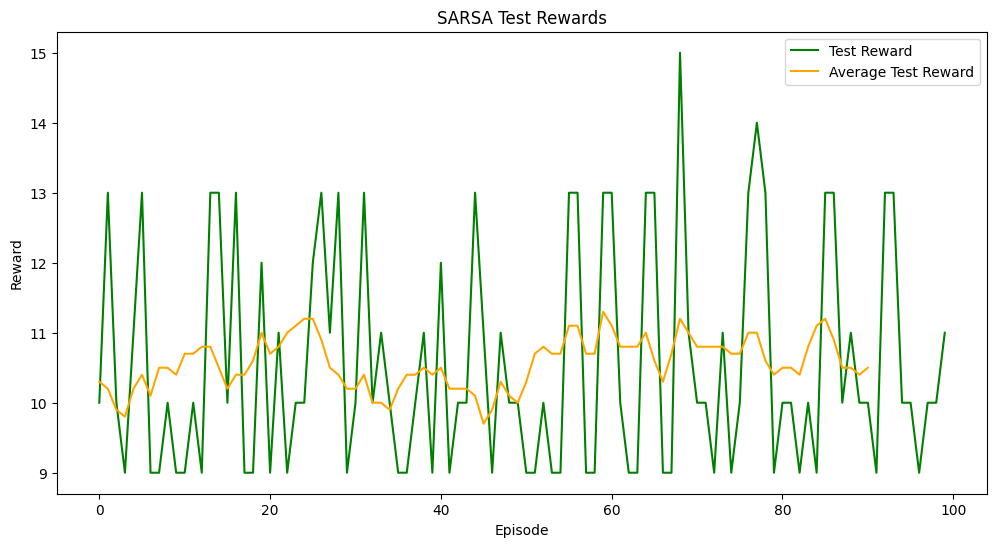

In [ ]:
test_sarsa(SarsaControl, config)